['L2 Kmedoids.ipynb', 'L1 - Orb Feature Detector and Feature matching.ipynb', 'Dads Python Sandbox.ipynb', 'L3 - Vocabulary tree and BOW.ipynb']
importing Jupyter notebook from L2 Kmedoids.ipynb
CPU times: user 172 ms, sys: 11.8 ms, total: 183 ms
Wall time: 185 ms
(770, 2)
optimiseClusterMembership
iteration
1
optimiseCentroidSelection
clusterIdx 0
getPermutationCostAndBestSelection 92
progress 0.0
progress 0.5
clusterIdx 1
getPermutationCostAndBestSelection 63
progress 0.0
clusterIdx 2
getPermutationCostAndBestSelection 94
progress 0.0
progress 0.5
clusterIdx 3
getPermutationCostAndBestSelection 3
progress 0.0
clusterIdx 4
getPermutationCostAndBestSelection 100
progress 0.0
progress 0.02
progress 0.04
progress 0.06
progress 0.08
progress 0.1
progress 0.12
progress 0.14
progress 0.16
progress 0.18
progress 0.2
progress 0.22
progress 0.24
progress 0.26
progress 0.28
progress 0.3
progress 0.32
progress 0.34
progress 0.36
progress 0.38
progress 0.4
progress 0.42
progress 0.44
progress 0.4

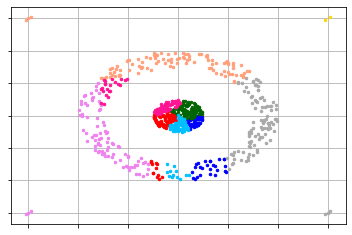

CPU times: user 3.71 s, sys: 33 ms, total: 3.74 s
Wall time: 3.71 s
seedClusters
c_id 0
c_id 1
c_id 2
clusterOpt
seedClusters
c_id 0
c_id 1
c_id 2
c_id 3
c_id 4
c_id 5
c_id 6
c_id 7
[53, 402, 401, 766, 400, 723, 463, 477, 605]
optimiseClusterMembership
optimiseCentroidSelection
clusterIdx 0
getPermutationCostAndBestSelection 444
progress 0.0
progress 0.5
clusterIdx 1
getPermutationCostAndBestSelection 3
progress 0.0
clusterIdx 2
getPermutationCostAndBestSelection 3
progress 0.0
clusterIdx 3
getPermutationCostAndBestSelection 3
progress 0.0
clusterIdx 4
getPermutationCostAndBestSelection 3
progress 0.0
clusterIdx 5
getPermutationCostAndBestSelection 80
progress 0.0
progress 0.1
progress 0.2
progress 0.3
progress 0.4
progress 0.5
progress 0.6
progress 0.7
progress 0.8
progress 0.9
clusterIdx 6
getPermutationCostAndBestSelection 86
progress 0.0
progress 0.5
clusterIdx 7
getPermutationCostAndBestSelection 72
progress 0.0
progress 0.5
clusterIdx 8
getPermutationCostAndBestSelection 76
progr

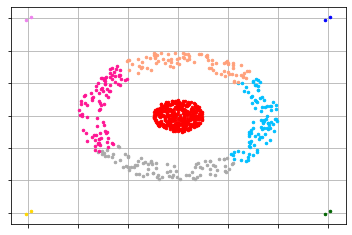

CPU times: user 1.8 s, sys: 3.82 ms, total: 1.8 s
Wall time: 1.79 s


In [1]:
from notebookHelper import NotebookLoader
nl = NotebookLoader()
L2 = nl.load_module("L2")


# The Vocabulary Tree

Implementing k-medoids recursively allows us to arrange our vocabulary features into a tree with the leaves defining clusters of local space, aka a "word" in visual space.

<div style="overflow:hidden; margin: 0; height:270px; width:100%">
<img src="https://i.stack.imgur.com/XJAYK.png" />
</div>

The tree structure represents how we partitioned the space. Take any (32,1) BRIEF feature descriptor and traverse the tree from root to leaf. At each step we comparse the hamming distance to the children and pick the "nearest" one. At the end of the tree traversal we have found our visual word(label) which best categorises our feature. 

![TreeIdeaDepicted](https://www.researchgate.net/profile/Stefan_Romberg/publication/224176868/figure/fig1/AS:669997554745344@1536751273090/Usage-of-a-vocabulary-tree-to-quantize-feature-vectors-into-discrete-visual-words-in.png)

In [2]:
import numpy as np #maths
visualFeatureVocabulary = None
visualFeatureVocabularyList = None
with open("data/ORBvoc.txt", "r") as fin:
    extractedFeatures = list(map(lambda x: x.split(" ")[2:-2], fin.readlines()[1:]))
    #dedup
    dedupedFeatureStrings = set()
    for extractedFeature in extractedFeatures:
        strRep = ".".join(extractedFeature)
        dedupedFeatureStrings.add(strRep)
    finalFeatures = []
    for dedupedFeatureStr in list(dedupedFeatureStrings):
        finalFeatures.append([int(i) for i in dedupedFeatureStr.split(".")])
        
    visualFeatureVocabulary = np.asarray(finalFeatures, dtype=np.uint8)
    visualFeatureVocabularyList  = list(finalFeatures)
print(visualFeatureVocabulary.shape)

(1062686, 32)


In [3]:
%%time
bestCentroids, bestCluster = L2.clusterOpt(visualFeatureVocabulary, 10, L2.hammingPoint, L2.hammingVector)

clusterOpt
seedClusters
c_id 0
c_id 1
c_id 2
c_id 3
c_id 4
c_id 5
c_id 6
c_id 7
c_id 8
[364804, 0, 2, 3, 4, 12, 24, 27, 41, 87]
optimiseClusterMembership
optimiseCentroidSelection
clusterIdx 0
getPermutationCostAndBestSelection 255332
progress 0.0
progress 0.5
clusterIdx 1
getPermutationCostAndBestSelection 155807
progress 0.0
clusterIdx 2
getPermutationCostAndBestSelection 58107
progress 0.0
clusterIdx 3
getPermutationCostAndBestSelection 131889
progress 0.0
clusterIdx 4
getPermutationCostAndBestSelection 160357
progress 0.0
clusterIdx 5
getPermutationCostAndBestSelection 78900
progress 0.0
progress 0.02
progress 0.04
progress 0.06
progress 0.08
progress 0.1
progress 0.12
progress 0.14
progress 0.16
progress 0.18
progress 0.2
progress 0.22
progress 0.24
progress 0.26
progress 0.28
progress 0.3
progress 0.32
progress 0.34
progress 0.36
progress 0.38
progress 0.4
progress 0.42
progress 0.44
progress 0.46
progress 0.48
progress 0.5
progress 0.52
progress 0.54
progress 0.56
progress 0.58


In [49]:
print(len(bestCentroids))
import pickle
#data = (bestCentroids, bestCluster)
#with open('firstlevel1.pickle', 'wb') as f:
#    pickle.dump(data, f)
with open('firstlevel0.pickle', 'rb') as f:
     data = pickle.load(f)
print(data)
total = 0
totalSave = 1062676
for cluster in data[1]:
    print(cluster.shape[0])
    total = total + cluster.shape[0]
print(total)

#convert each cluster into data
#for clusters in data[1]:
bestCluster2_10_ids = data[1][9]
bestCluster2_10_data = np.take(visualFeatureVocabulary, bestCluster2_10_ids, 0)
print(bestCluster2_10_data)

bestCentroids2_10, bestCluster2_10 = L2.clusterOpt(bestCluster2_10_data, 10, L2.hammingPoint, L2.hammingVector)

10
(array([20319,     0,     2,     3,     4,    12,    24,    27,    41,
          87]), [array([      7,      15,      16, ..., 1062676, 1062683, 1062685]), array([      1,       5,       6, ..., 1062666, 1062668, 1062671]), array([     83,     114,     149, ..., 1062678, 1062680, 1062681]), array([     14,      26,      30, ..., 1062626, 1062665, 1062682]), array([      9,      10,      19, ..., 1062647, 1062656, 1062667]), array([     11,      31,      35, ..., 1062638, 1062643, 1062662]), array([     54,      63,      77, ..., 1062660, 1062670, 1062677]), array([      8,      32,      44, ..., 1062655, 1062658, 1062679]), array([     33,      50,      92, ..., 1062644, 1062657, 1062661]), array([     42,     103,     127, ..., 1062612, 1062621, 1062684])])
354364
148297
49844
109713
138108
62857
62429
66252
41415
29397
1062676
[[ 37  51  89 ... 171  82 241]
 [ 43 187 114 ... 142 202 141]
 [ 10 235  98 ... 148 175 221]
 ...
 [ 37  97 169 ... 123  90 132]
 [ 47 151  97 ... 142 249 2

In [50]:
print(bestCentroids2_10)

[ 2719     0     3     9    21 14999    26    52    53    58]


# Bag Of Words (BOW) [Yet another space!]
If we take the collection of features from an input image, we can via the tree traversal compute "votes" for each word in our visual vocabulary. Then summing the features via some metric; we derive our final BOW vector for this image. Think of this as a sort of barcode for the image, where we have a histogram of the existance of paritcular visual ques of the scene.

<div style="overflow:hidden; margin: 0; height:200px; width:100%">
<img style="margin-top:-270px" src="https://i.stack.imgur.com/XJAYK.png" />
</div>

This is a nice representation allows for easy semantic comparison to other images with some concept of the score or the quality of a match.

In [4]:
#imports 
import numpy as np #maths
import cv2 #open computer vision
from matplotlib import pyplot as plt #plotting library

In [5]:
#Example get a video source
cap = cv2.VideoCapture(0)

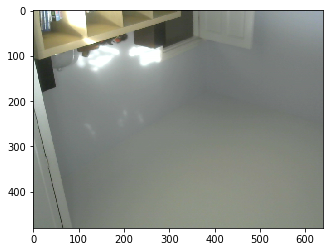

In [6]:
#Example show an image
ret, input_image = cap.read() 
plt.imshow(input_image[:,:,::-1]) #[:,:,::-1] converts BGR to RGB

In [7]:
cap.release()

In [8]:
def getOrb():
    return cv2.ORB_create(edgeThreshold=15, patchSize=31, nlevels=6, fastThreshold=2, nfeatures=1000000, scoreType=cv2.ORB_FAST_SCORE, firstLevel=0)

class CV:
    def __init__(self, detector):
        self.detector = detector
    def plotImage(self, img):
        plt.imshow(img[:,:,::-1])
    def imgExtractKPDes(self, img):
        (kp, des) = orb.detectAndCompute(input_image, None)
        return (kp, des)
    def annotateImgWithKPDes(self, img, kpdes):
        return cv2.drawKeypoints(img,kpdes[0],color=(0,255,0), outImage=None, flags=0)
        

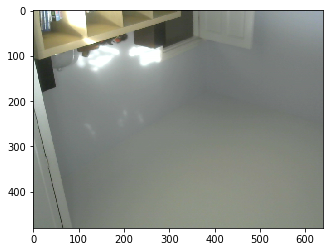

In [9]:
orb = getOrb()
cv = CV(orb)
cv.plotImage(input_image)

In [10]:
input_image_kpdes = cv.imgExtractKPDes(input_image)
print(input_image_kpdes)

([<KeyPoint 0x7f8749fbbba0>, <KeyPoint 0x7f8749fbbe10>, <KeyPoint 0x7f8749fbbdb0>, <KeyPoint 0x7f8749fbbf30>, <KeyPoint 0x7f8749fbb900>, <KeyPoint 0x7f8749fbb300>, <KeyPoint 0x7f8749fbb330>, <KeyPoint 0x7f8749fbb0c0>, <KeyPoint 0x7f8749fbbfc0>, <KeyPoint 0x7f8749fbbe40>, <KeyPoint 0x7f8749fbbc00>, <KeyPoint 0x7f8749fbb180>, <KeyPoint 0x7f8749fbbde0>, <KeyPoint 0x7f874a0eb840>, <KeyPoint 0x7f874a0ebc00>, <KeyPoint 0x7f874a0eb030>, <KeyPoint 0x7f874a0ebed0>, <KeyPoint 0x7f874a0ebf00>, <KeyPoint 0x7f874a0eb330>, <KeyPoint 0x7f874a0eb990>, <KeyPoint 0x7f874a0ebf90>, <KeyPoint 0x7f874a0eb9f0>, <KeyPoint 0x7f874a0eb120>, <KeyPoint 0x7f874a0eb930>, <KeyPoint 0x7f8747290d20>, <KeyPoint 0x7f8747290f00>, <KeyPoint 0x7f8747290de0>, <KeyPoint 0x7f8747290c60>, <KeyPoint 0x7f8747290a80>, <KeyPoint 0x7f8747290ae0>, <KeyPoint 0x7f8747290a20>, <KeyPoint 0x7f8747290c00>, <KeyPoint 0x7f8747290cc0>, <KeyPoint 0x7f8747290ba0>, <KeyPoint 0x7f8747290d80>, <KeyPoint 0x7f8747290fc0>, <KeyPoint 0x7f8747290ea0>,

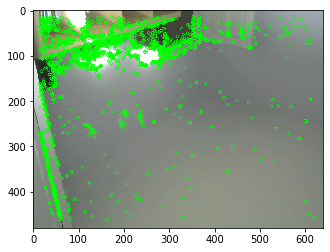

In [11]:
cv.plotImage(cv.annotateImgWithKPDes(input_image, input_image_kpdes))

In [12]:
kp, des = input_image_kpdes

In [13]:
des

array([[146, 174, 184, ..., 101,  39, 195],
       [229, 116, 165, ..., 255,  80,  96],
       [147, 205,  38, ...,  62, 185, 156],
       ...,
       [197, 239, 147, ..., 251, 163, 129],
       [ 69, 229, 159, ..., 251, 161, 161],
       [ 69, 231, 159, ..., 242,  35, 161]], dtype=uint8)

In [14]:
des.shape

(2540, 32)

In [15]:
kp_des_mean = np.mean(np.sqrt(des), axis=0).reshape(1, -1)
kp_des_mean.shape

(1, 32)

In [16]:
#lets get vocab
keypointDescriptors = None
with open("data/ORBvoc.txt", "r") as fin:
    kpListWithoutScoreOrIndex = list(map(lambda x: x.split(" ")[2:-2], fin.readlines()[1:]))
    keypointDescriptors = np.asarray(kpListWithoutScoreOrIndex, dtype=np.uint8)
keypointDescriptors.shape

(1082072, 32)

In [17]:
keypointDescriptors = np.sqrt(keypointDescriptors)

In [18]:
kp_des_mean=np.mean(keypointDescriptors, axis=0).reshape(1,-1)
kp_des_mean.shape

(1, 32)

In [19]:
# this sort of clustering only works well for non binary string type data. e.g. sift/surf features as it uses eucledean distance when with orb we should use hamming
retval, bestLabels, centers = cv2.kmeans(data=np.asarray(keypointDescriptors, dtype=np.float32), bestLabels=None, K=1024,criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 1, 10), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS) 

In [20]:
import sys
(cv2.__version__, sys.version_info)

('4.1.2',
 sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0))

In [21]:
centers[0].shape


(32,)

In [22]:
centers[1].shape

(32,)

In [23]:
len(centers)

1024

In [24]:
bestLabels

array([[ 421],
       [ 421],
       [ 399],
       ...,
       [ 742],
       [1011],
       [1011]], dtype=int32)

In [25]:
## kmedoids can take any distance metric
# https://github.com/terkkila/scikit-learn/blob/kmedoids/sklearn/cluster/k_medoids_.py
import sklearn

In [26]:
from pyclustering.cluster.kmedoids import kmedoids


In [27]:
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)


In [28]:
sample

[[0.0, 0.0],
 [0.1, -0.1],
 [0.2, -0.2],
 [0.3, -0.3],
 [0.4, -0.4],
 [0.5, -0.5],
 [0.6, -0.6],
 [0.7, -0.7],
 [0.8, -0.8],
 [0.9, -0.9],
 [1.0, -1.0],
 [0.1, 0.1],
 [0.2, 0.0],
 [0.3, -0.1],
 [0.4, -0.2],
 [0.5, -0.3],
 [0.6, -0.4],
 [0.7, -0.5],
 [0.8, -0.6],
 [0.9, -0.7],
 [1.0, -0.8],
 [1.1, -0.9],
 [0.2, 0.2],
 [0.3, 0.1],
 [0.4, 0.0],
 [0.5, -0.1],
 [0.6, -0.2],
 [0.7, -0.3],
 [0.8, -0.4],
 [0.9, -0.5],
 [1.0, -0.6],
 [1.1, -0.7],
 [1.2, -0.8],
 [0.3, 0.3],
 [0.4, 0.2],
 [0.5, 0.1],
 [0.6, 0.0],
 [0.7, -0.1],
 [0.8, -0.2],
 [0.9, -0.3],
 [1.0, -0.4],
 [1.1, -0.5],
 [1.2, -0.6],
 [1.3, -0.7],
 [0.4, 0.4],
 [0.5, 0.3],
 [0.6, 0.2],
 [0.7, 0.1],
 [0.8, 0.0],
 [0.9, -0.1],
 [1.0, -0.2],
 [1.1, -0.3],
 [1.2, -0.4],
 [1.3, -0.5],
 [1.4, -0.6],
 [0.5, 0.5],
 [0.6, 0.4],
 [0.7, 0.3],
 [0.8, 0.2],
 [0.9, 0.1],
 [1.0, 0.0],
 [1.1, -0.1],
 [1.2, -0.2],
 [1.3, -0.3],
 [1.4, -0.4],
 [1.5, -0.5],
 [0.6, 0.6],
 [0.7, 0.5],
 [0.8, 0.4],
 [0.9, 0.3],
 [1.0, 0.2],
 [1.1, 0.1],
 [1.2, 0.0],
 [1.3,